# Fits and Data Analysis
---
* Analysing and fitting Data (usage of scipy)
* Visualisation of fits
* Basics of Classification

#### Create a function for fast plotting to rapidly check/visualize some data

In [46]:
import matplotlib.pyplot as plt

# needed only in jupyter and this session ---
# please ignore the following 3 lines
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

plt.rc('text', usetex=True)
plt.rc('font', **{'family': 'DejaVu Sans','size': 20})

def fast_plot(x, y, xlabel="x", ylabel="y"):
    """
    Function for plotting y vs x as points
        optional arguments are the axis labels
    """
    
    fig, ax = plt.subplots()
    ax.plot(x, y, ".")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    fig.show()

## Basics of fitting

Lets generate a linear relationship with some noise and fit a function to it

In [34]:
import numpy as np

# create a random linear dataset
N = 100
x = np.linspace(0, 1, N)
randnr = np.random.rand(N)
y = - x + 2.0 + (randnr*0.5)

Now lets check that the created linear relationship has indeed a decaying behaviour

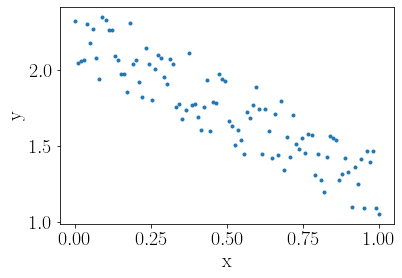

In [45]:
fast_plot(x, y)

### Fitting the data

Here we generated both the x and the y values. Usually when fitting the latter represent the dependent variable which we would like to fit.

The first step is to understand what function we would like to fit to y. In this case it a linear slope. We thus create such a function with some unknown coefficients $a$ and $c$: $f(x) = a x + c$

In [47]:
def fitting_lin_slope(x, a, c):
    return a * x + c

Now we load an additional library that is built upon `numpy` and is specifically designed for scientific computing. We don't load the entire library, but only the fitting function we need

In [48]:
from scipy.optimize import curve_fit

`curve_fit()` is a function that, as the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) tells us, uses "non-linear least squares to fit a function, f, to data".

In other words: we have to give `curve_fit` a function (which we assume will fit our data), the independet values of x and the dependent values of y.

The output will be twofold: 
* on one side we have an array with the optimal values for the coefficients of our function (in this case $a$ and $c$)
* on the other we get a matrix with the covariance values of the optimized coefficients, from which we can the compute the standard deviation taking the square root of the diagonal elements.


In [87]:
    # optimize function coefficients | test bounds=([-1,0], [0,2])
opt_vals, cov_coeff = curve_fit(fitting_lin_slope, x, y)

print("optimal a = {}\noptimal c = {}\n\nstd of a = {}\nstd of c = {}".
      format(opt_vals[0], opt_vals[1], *np.sqrt(np.diag(cov_coeff))))

optimal a = -0.9888106046336984
optimal c = 2.2260883503345648

std of a = 0.04867694056194417
std of c = 0.028174524194465894


as we can see the optimal $a$ is indeed close to $-1$ and the optimal $c$ is close to $2.25$ as we defined them in our generating relationship

__note__: for a list `l = [0,1,2,3,4, ... , n]` writing `*l` is equivalent to writing `l[0], l[1], l[2], ... ,l[n]`. We are going to use this notation more often in the following

---
Now lets visualize the data with its fit. To do so it is now very convenient that we defined the fitting function, since we can now use this to generate the fitting slope

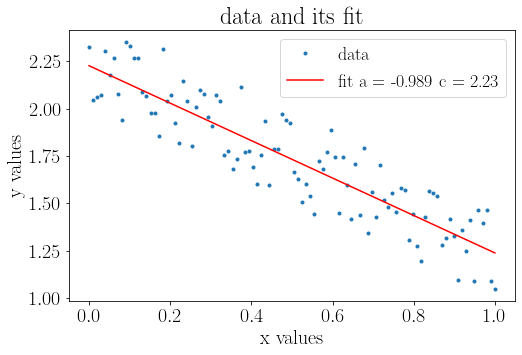

In [88]:
fig, ax = plt.subplots(figsize=(8,5) tight_layout = True)

text_label_fit = "fit a = {:.3} c = {:.3}".format(*opt_vals)

ax.plot(x, y, ".", label="data")
ax.plot(x, fitting_lin_slope(x, *opt_vals), "r-", label = text_label_fit)

ax.legend(fontsize=18)

ax.set_xlabel("x values")
ax.set_ylabel("y values")

ax.set_title("data and its fit")

fig.show()

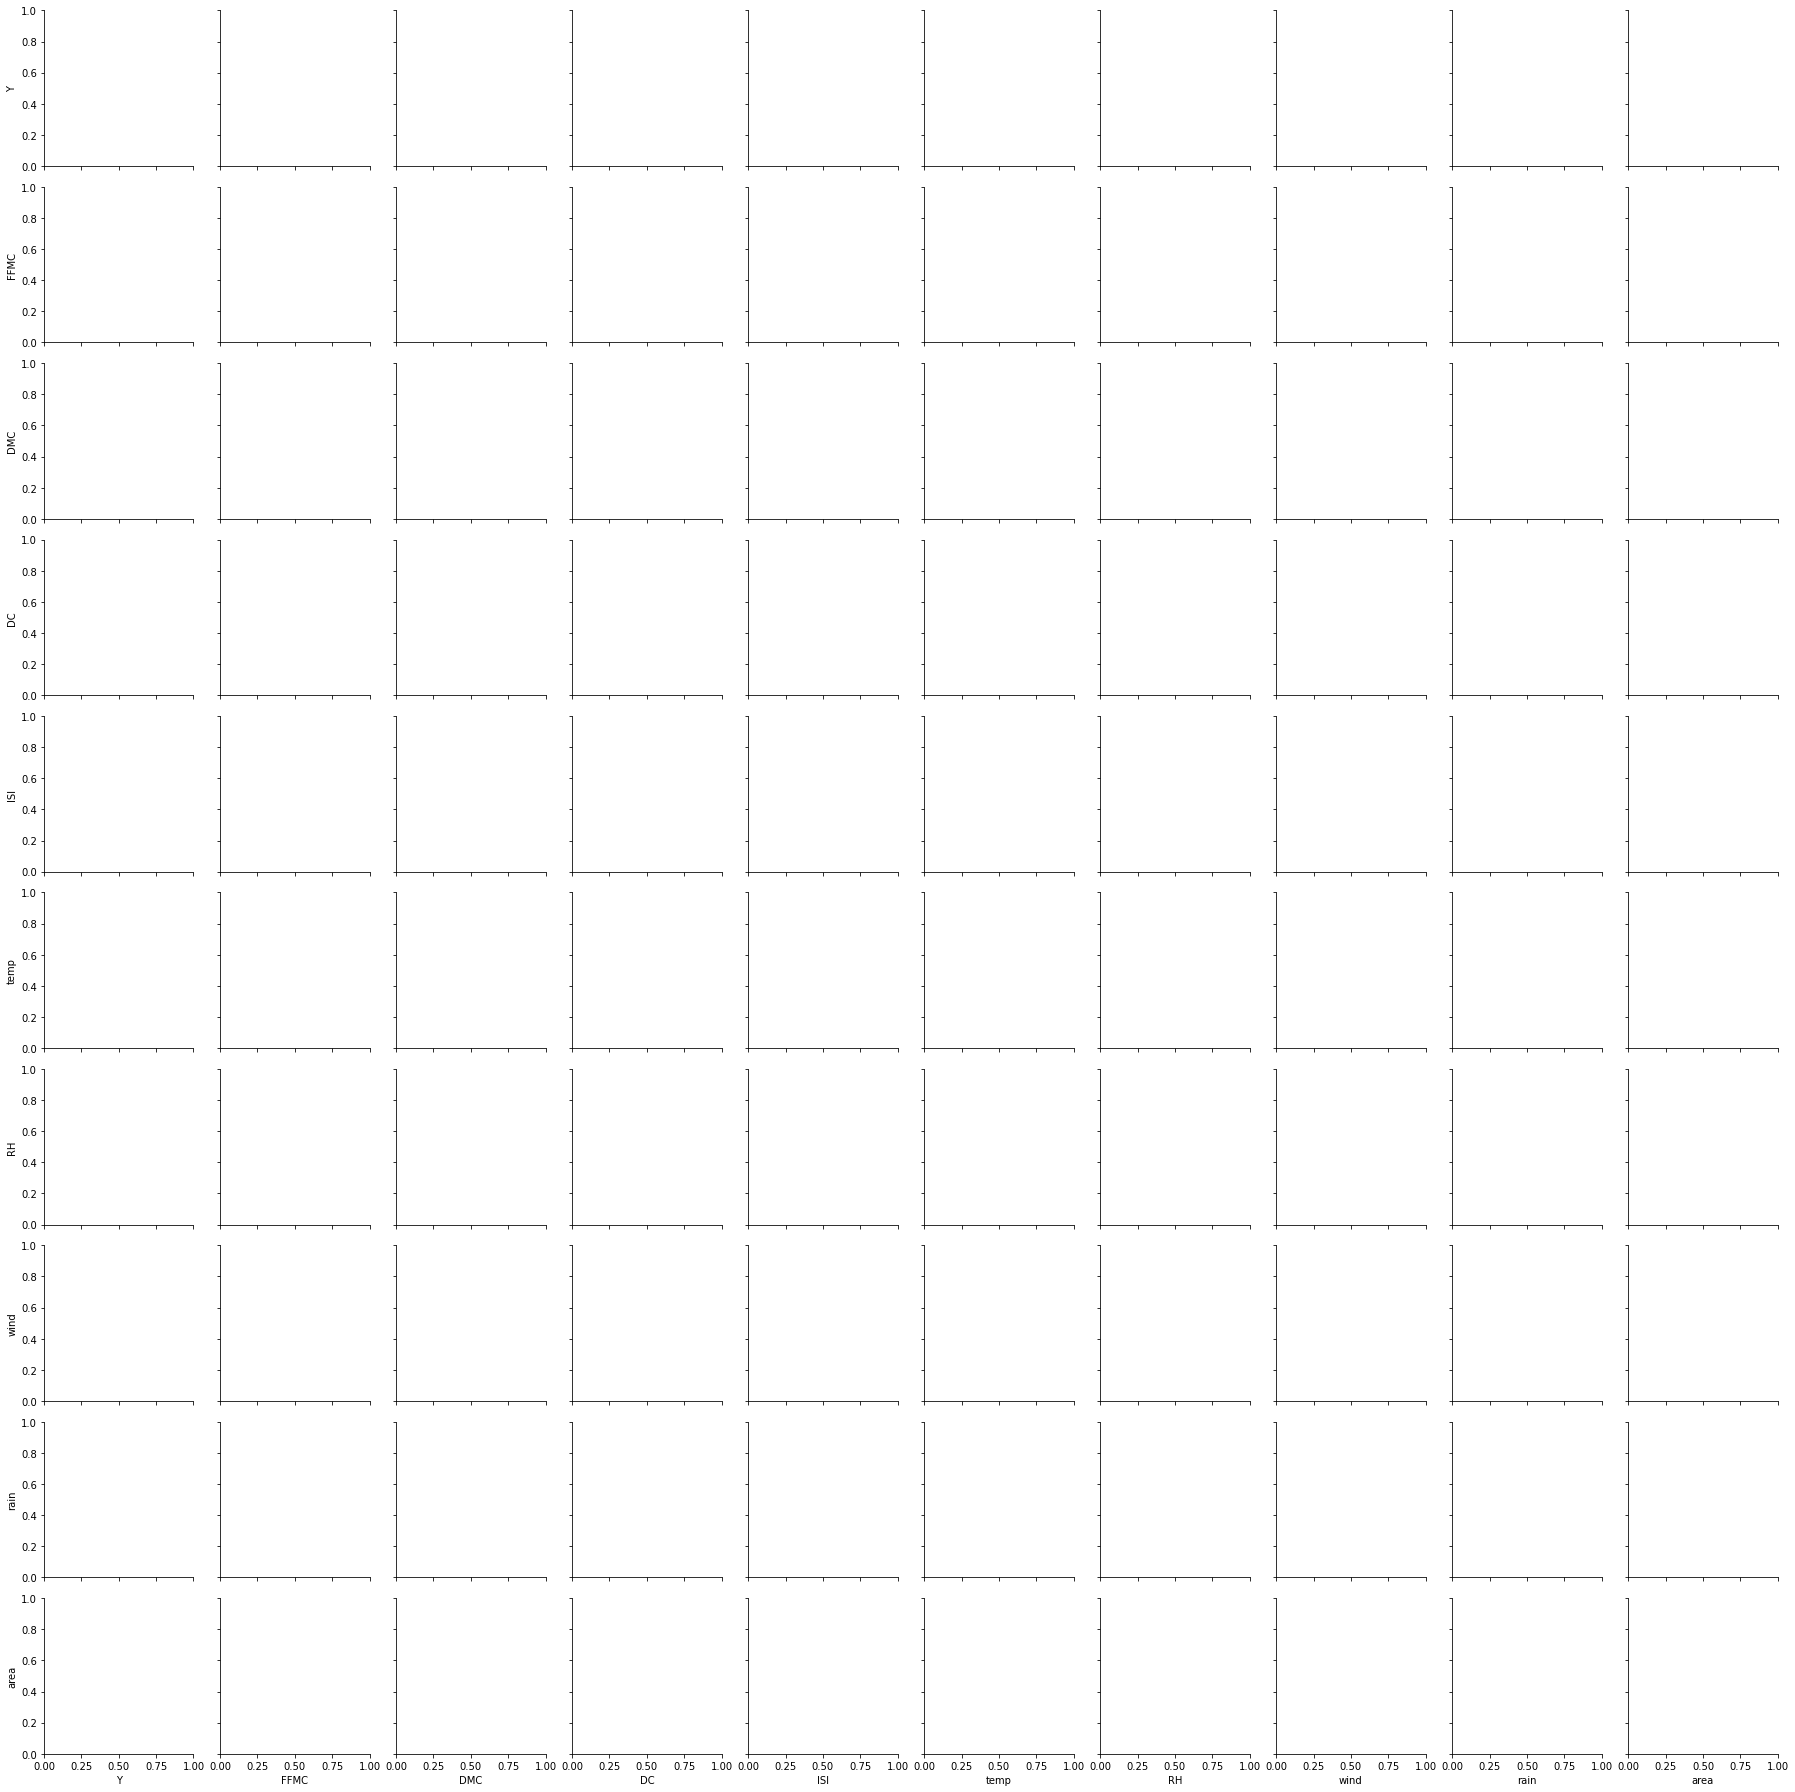

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv', 
                   index_col=0)
data



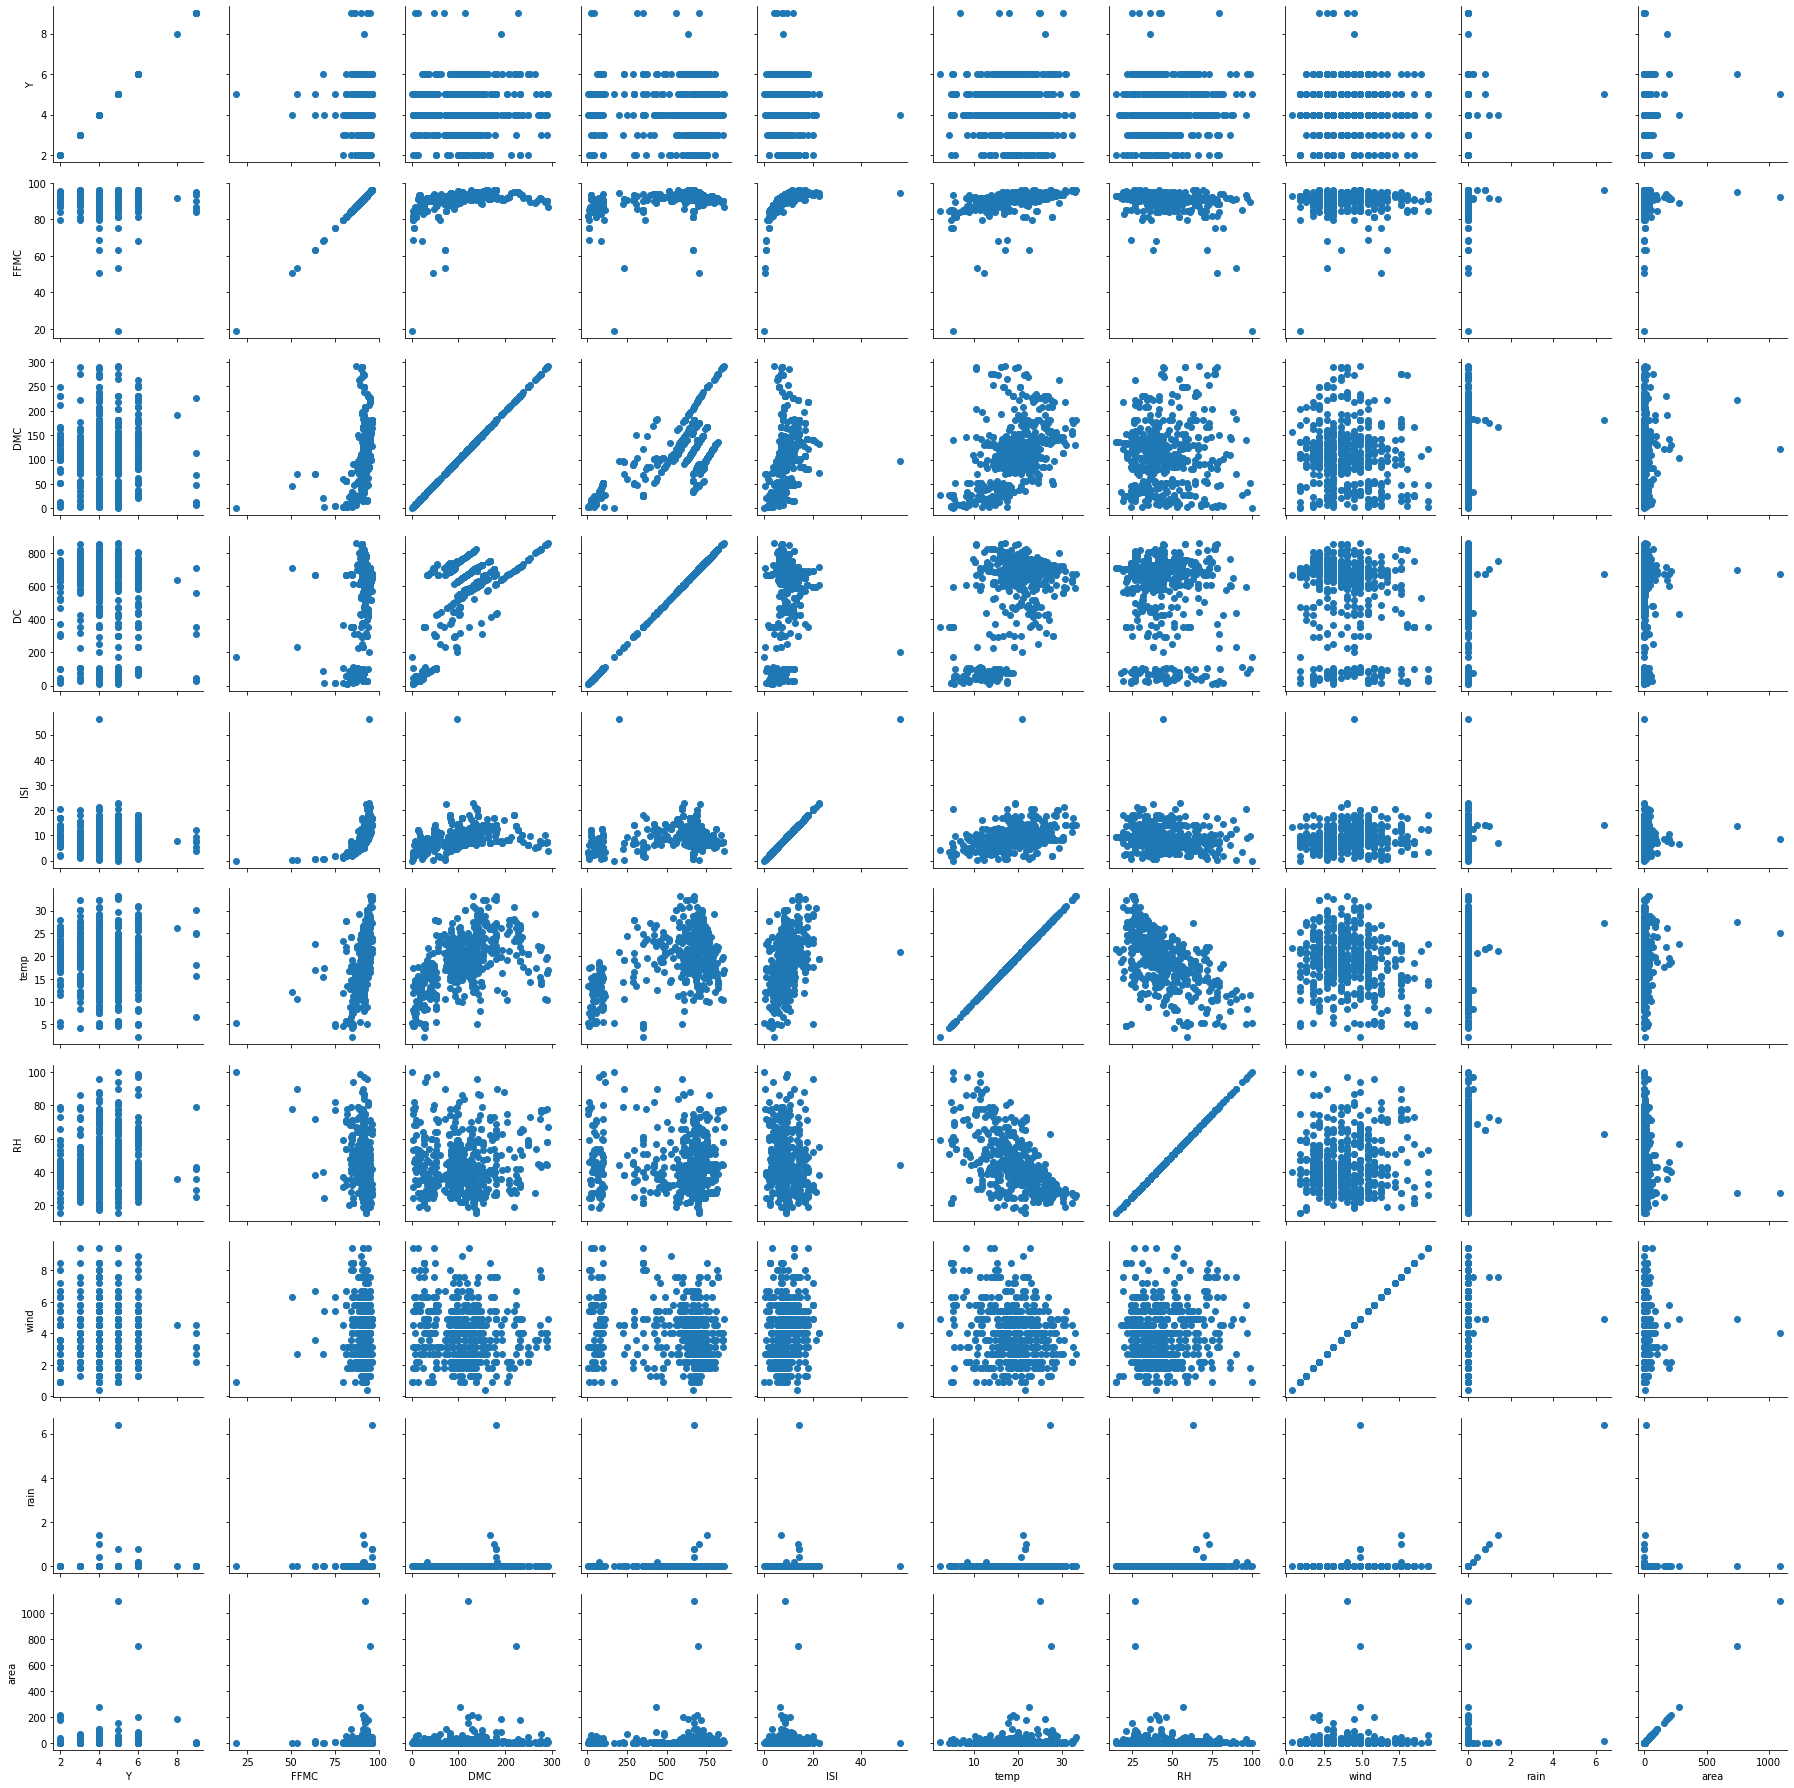

In [14]:
import seaborn as sns


g = sns.PairGrid(data)
g.map(plt.scatter)

In [12]:
data

,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,,,,,,,,,,,,
7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16


## Assignments
---
* Create an exponentially decaying relationship with some noise and fit it using first a linear slope function and then an exponential function. Compare and comment on the covariance/standar deviation.